In [48]:
import os
import pandas as pd

from pyspark.sql import SparkSession
from pyspark.sql.functions import col 


spark = SparkSession.builder.getOrCreate()

## Data Import

In [49]:
df = spark.read.csv('data.csv', inferSchema=True, header = True)

In [50]:
df.count()

6819

## Exploratory Data Analysis

In [51]:
# Look for columns with null values
null_col = []
for c in df.columns:
    if not df.where(col(c).isNull()).limit(1).collect() == []:
        null_col.append(c)
print(null_col)

[]


In [52]:
# Examine class balance
print('Number of Non-bankrupt Companies: ', df.where(col('Bankrupt?') == 0).count(),
      ', %: ', round(df.where(col('Bankrupt?') == 0).count()/df.count()*100, 2))
print('Number of Bankrupt Companies: ', df.where(col('Bankrupt?') == 1).count(),
      ', %: ', round(df.where(col('Bankrupt?') == 1).count()/df.count()*100, 2))

Number of Non-bankrupt Companies:  6599 , %:  96.77
Number of Bankrupt Companies:  220 , %:  3.23


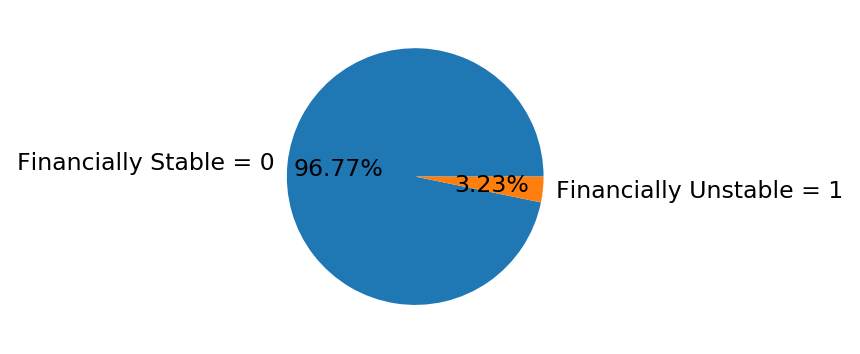

In [53]:
# pie chart of clsas balance
bankrupt0 = df.filter(df['Bankrupt?'] == 0).count()
bankrupt1 = df.filter(df['Bankrupt?'] == 1).count()
bankrupt_ls = [bankrupt0, bankrupt1]
bankrupt_labels = ['Financially Stable = 0', 'Financially Unstable = 1']

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['figure.dpi']=170
fig = plt.figure(figsize = (2.5,2.5))
plt.pie(bankrupt_ls, labels=bankrupt_labels, autopct = '%.2f%%')
plt.show()

In [54]:
import pandas as pd

pd.set_option('display.max_columns', None)

df.select("*").describe().toPandas()

,summary,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),Operating Expense Rate,Research and development expense rate,Cash flow rate,Interest-bearing debt interest rate,Tax rate (A),Net Value Per Share (B),Net Value Per Share (A),Net Value Per Share (C),Persistent EPS in the Last Four Seasons,Cash Flow Per Share,Revenue Per Share (Yuan ¥),Operating Profit Per Share (Yuan ¥),Per Share Net profit before tax (Yuan ¥),Realized Sales Gross Profit Growth Rate,Operating Profit Growth Rate,After-tax Net Profit Growth Rate,Regular Net Profit Growth Rate,Continuous Net Profit Growth Rate,Total Asset Growth Rate,Net Value Growth Rate,Total Asset Return Growth Rate Ratio,Cash Reinvestment %,Current Ratio,Quick Ratio,Interest Expense Ratio,Total debt/Total net worth,Debt ratio %,Net worth/Assets,Long-term fund suitability ratio (A),Borrowing dependency,Contingent liabilities/Net worth,Operating profit/Paid-in capital,Net profit before tax/Paid-in capital,Inventory and accounts receivable/Net value,Total Asset Turnover,Accounts Receivable Turnover,Average Collection Days,Inventory Turnover Rate (times),Fixed Assets Turnover Frequency,Net Worth Turnover Rate (times),Revenue per person,Operating profit per person,Allocation rate per person,Working Capital to Total Assets,Quick Assets/Total Assets,Current Assets/Total Assets,Cash/Total Assets,Quick Assets/Current Liability,Cash/Current Liability,Current Liability to Assets,Operating Funds to Liability,Inventory/Working Capital,Inventory/Current Liability,Current Liabilities/Liability,Working Capital/Equity,Current Liabilities/Equity,Long-term Liability to Current Assets,Retained Earnings to Total Assets,Total income/Total expense,Total expense/Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Working capitcal Turnover Rate,Cash Turnover Rate,Cash Flow to Sales,Fixed Assets to Assets,Current Liability to Liability,Current Liability to Equity,Equity to Long-term Liability,Cash Flow to Total Assets,Cash Flow to Liability,CFO to Assets,Cash Flow to Equity,Current Liability to Current Assets,Liability-Assets Flag,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,count,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819,6819
1,mean,0.03226279513125092,0.505179633241782,0.5586249158750473,0.5535887093516647,0.6079480383703836,0.6079294691769787,0.9987551277900453,0.7971897524712888,0.8090835935135369,0.30362292364973476,0.7813814325261427,1.9953473128027918E9,1.950427306056799E9,0.46743118577966175,1.6448012905942492E7,0.11500074794142456,0.19066057949747367,0.1906331789677462,0.19067237025316164,0.22881285256452713,0.32348191216983185,1328640.6020960642,0.10909073887546941,0.1843605776420337,0.02240785447416586,0.8479799951688057,0.689146118568132,0.6891500117795625,0.2176390129969667,5.508096595248731E9,1566212.0552410616,0.2642475118758422,0.37967667232266256,403284.9542449723,8376594.819684908,0.6309910117124122,4416336.714259364,0.11317708497306005,0.8868229150269425,0.008782733815036815,0.37465429459871874,0.0059682772664793535,0.10897668140

A lot of features seem to be percentages or ratios, basically between 0 and 1. Might consider standardizing the features using Normalizer to standardize the input data and improve the behavior of learning algorithms. Also consider that the Net Income Flag has values of 1 for every observation, could consider removing it altogether.

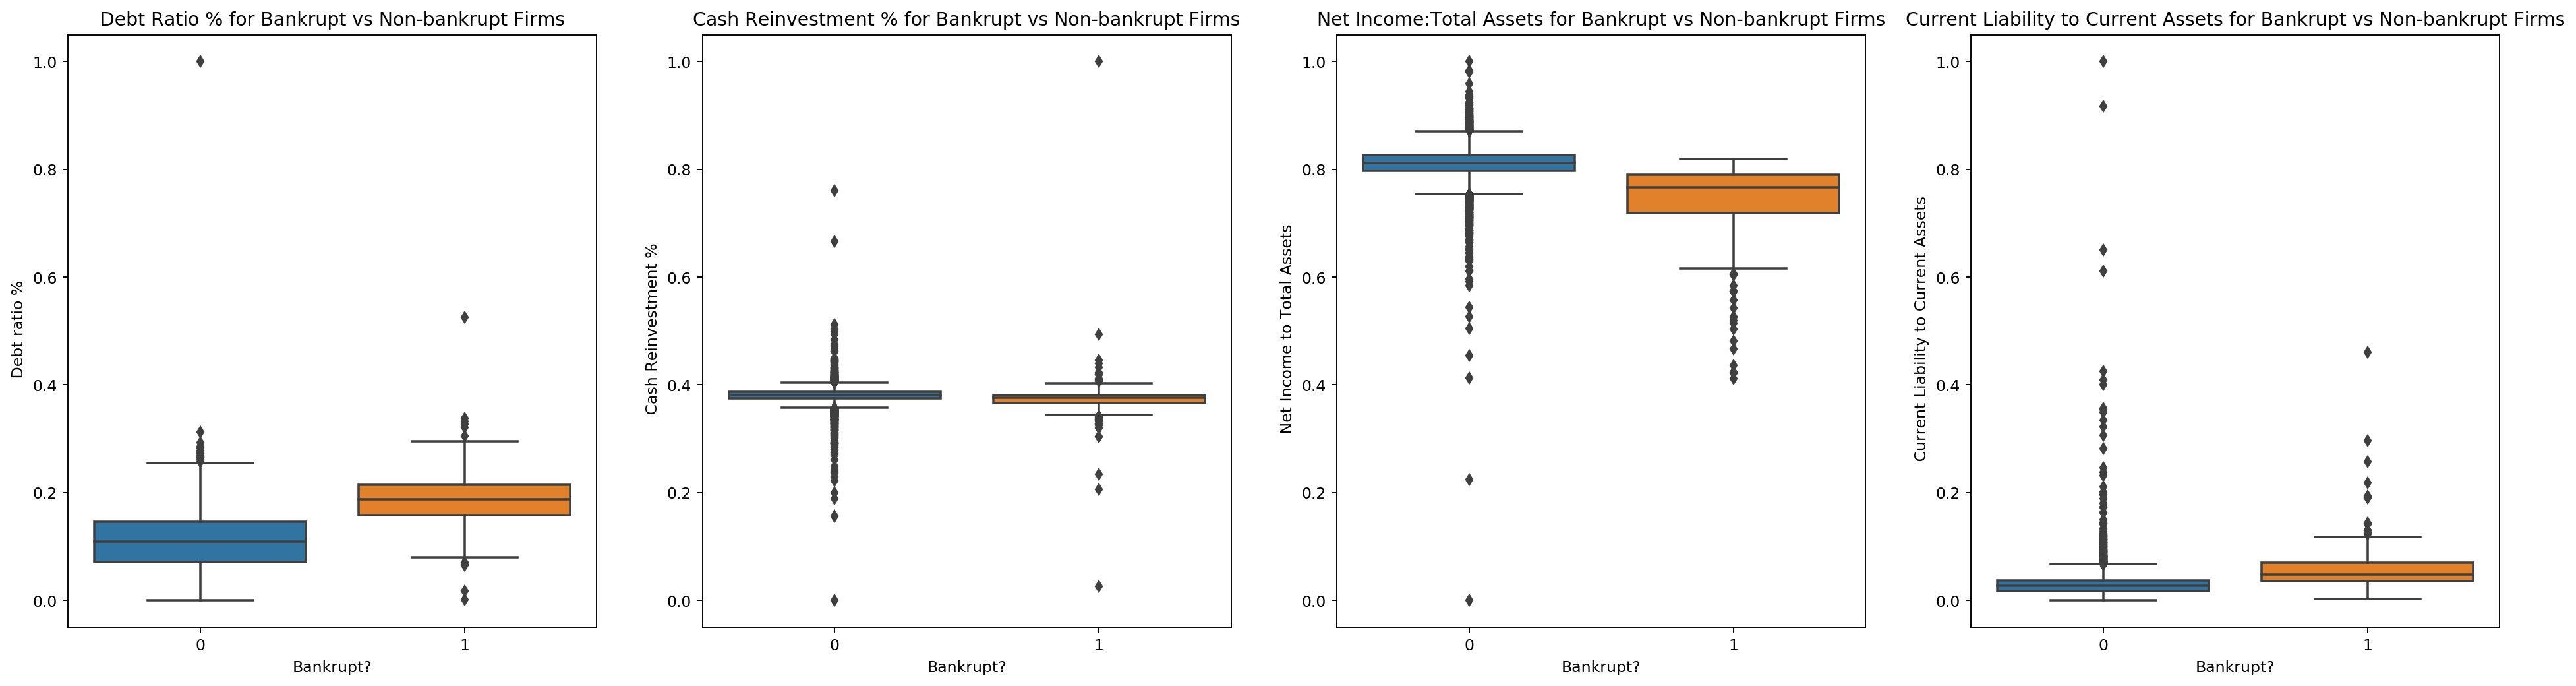

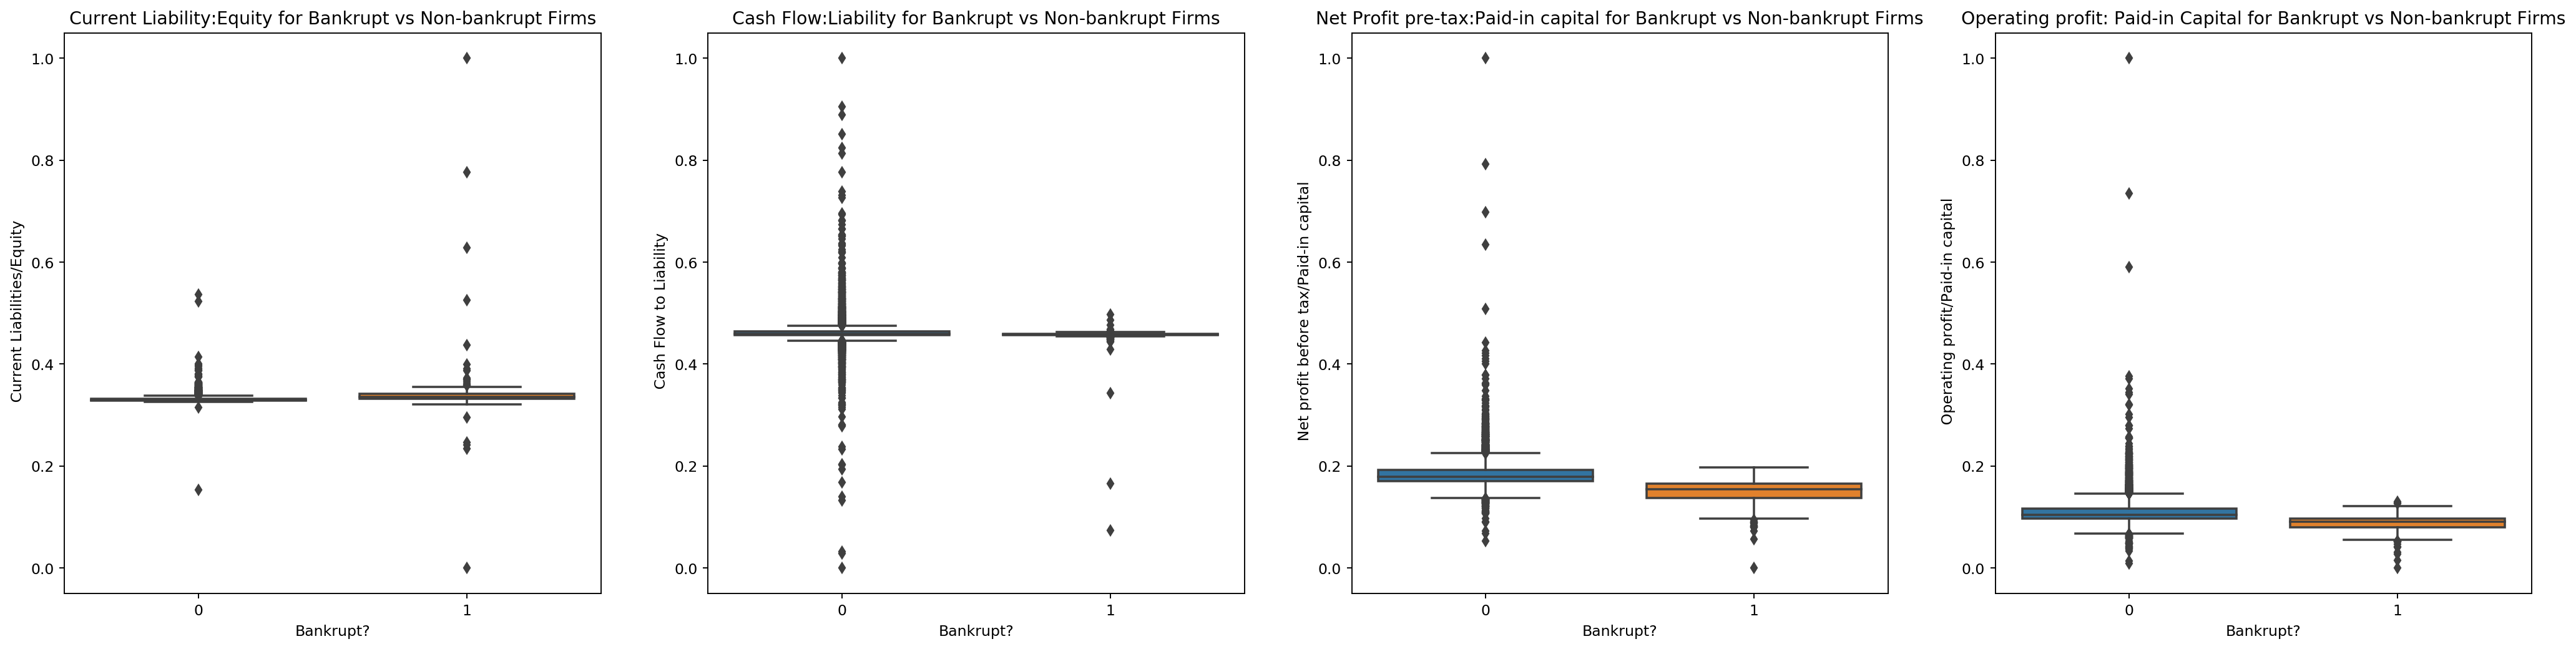

In [60]:
import seaborn as sns

#boxplots to examine specific features

pdf = df.toPandas()
f, axes = plt.subplots(ncols = 4, figsize = (28,7))

sns.boxplot(data = pdf, ax = axes[0], x = 'Bankrupt?', y = ' Debt ratio %')
axes[0].set_title('Debt Ratio % for Bankrupt vs Non-bankrupt Firms')

sns.boxplot(data = pdf, ax = axes[1], x ='Bankrupt?', y = ' Cash Reinvestment %')
axes[1].set_title('Cash Reinvestment % for Bankrupt vs Non-bankrupt Firms')

sns.boxplot(data = pdf, ax = axes[2], x = 'Bankrupt?', y = ' Net Income to Total Assets') 
axes[2].set_title('Net Income:Total Assets for Bankrupt vs Non-bankrupt Firms')

sns.boxplot(data = pdf, ax = axes[3], x ='Bankrupt?', y =' Current Liability to Current Assets')  
axes[3].set_title('Current Liability to Current Assets for Bankrupt vs Non-bankrupt Firms') 

f, axes = plt.subplots(ncols = 4, figsize = (30, 7))

sns.boxplot(data = pdf, ax = axes[0], x = 'Bankrupt?', y = ' Current Liabilities/Equity')
axes[0].set_title('Current Liability:Equity for Bankrupt vs Non-bankrupt Firms')

sns.boxplot(data = pdf, ax = axes[1], x ='Bankrupt?', y = ' Cash Flow to Liability')
axes[1].set_title('Cash Flow:Liability for Bankrupt vs Non-bankrupt Firms')

sns.boxplot(data = pdf, ax = axes[2], x = 'Bankrupt?', y = ' Net profit before tax/Paid-in capital') 
axes[2].set_title('Net Profit pre-tax:Paid-in capital for Bankrupt vs Non-bankrupt Firms')

sns.boxplot(data = pdf, ax = axes[3], x ='Bankrupt?', y =' Operating profit/Paid-in capital')  
axes[3].set_title('Operating profit: Paid-in Capital for Bankrupt vs Non-bankrupt Firms') 

plt.show()


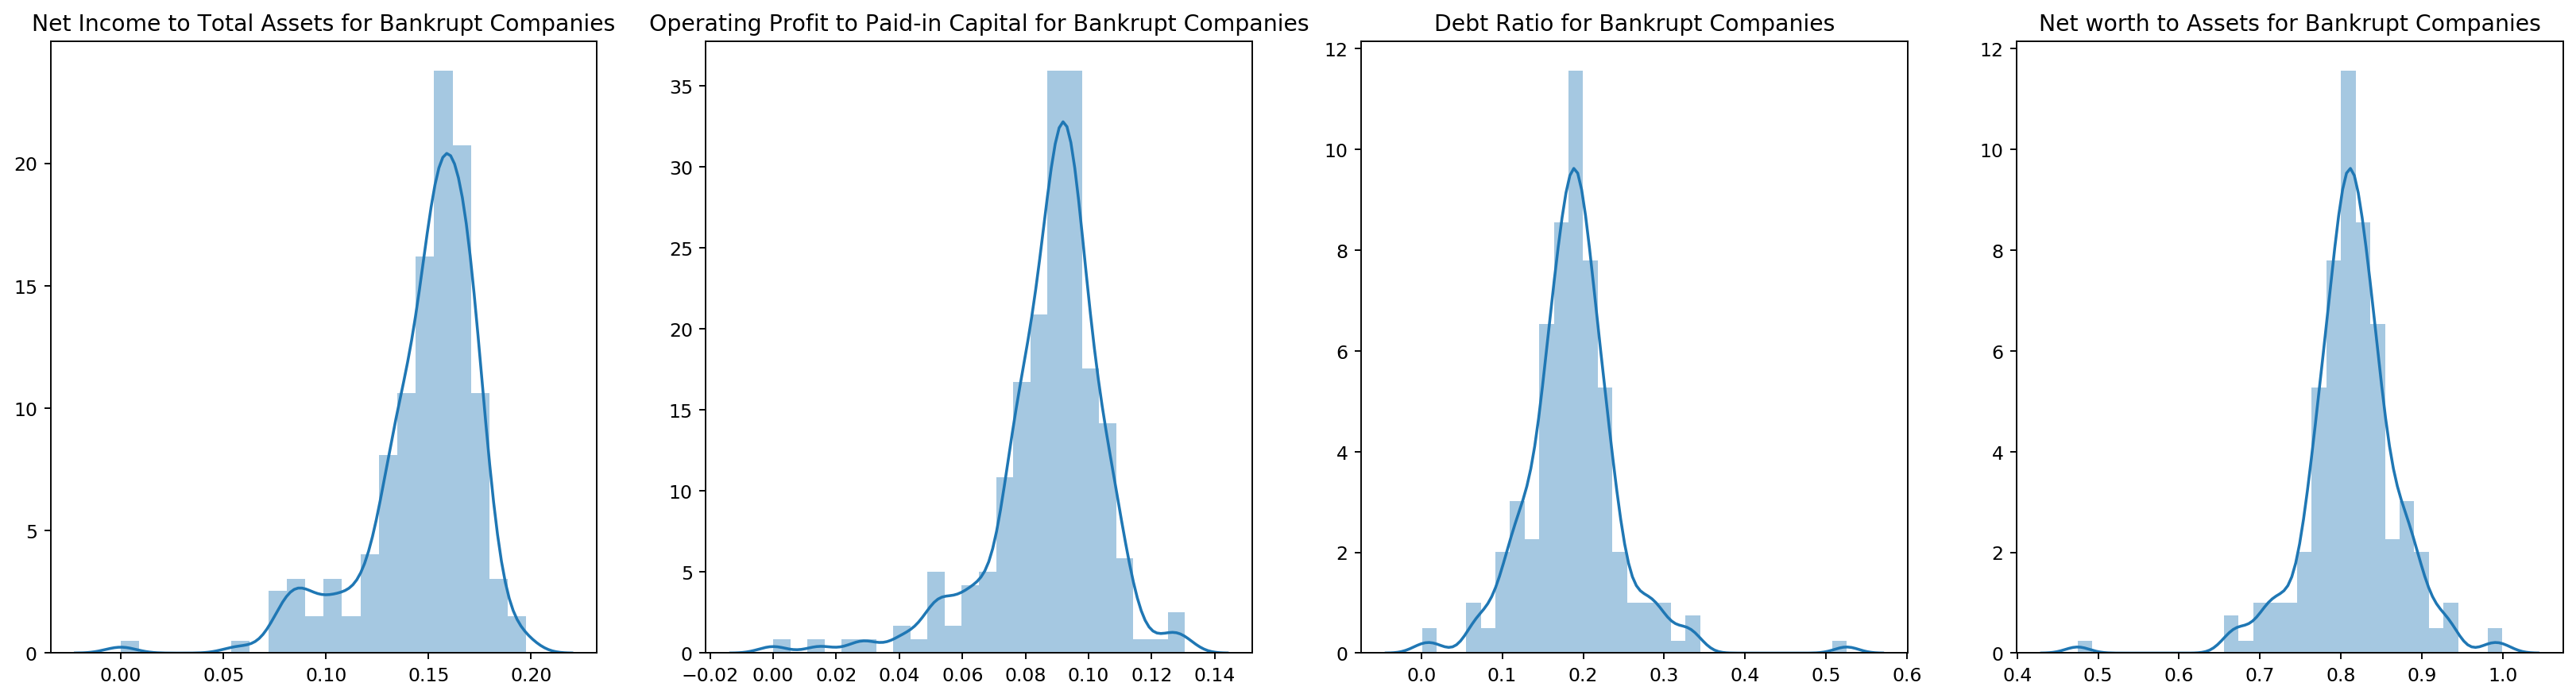

In [62]:
#histograms for selected features of interest

f, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize=(24, 6))

pretax_net_profit = pdf[ ' Net profit before tax/Paid-in capital'].loc[pdf['Bankrupt?'] == 1].values
sns.distplot(pretax_net_profit,ax=ax1)
ax1.set_title('Net Income to Total Assets for Bankrupt Companies')

tot_debt_net = pdf[' Operating profit/Paid-in capital'].loc[pdf['Bankrupt?'] == 1].values
sns.distplot(tot_debt_net ,ax=ax2)
ax2.set_title('Operating Profit to Paid-in Capital for Bankrupt Companies')


debt_ratio = pdf[' Debt ratio %'].loc[pdf['Bankrupt?'] == 1].values
sns.distplot(debt_ratio,ax=ax3)
ax3.set_title('Debt Ratio for Bankrupt Companies')

net_worth_assets = pdf[' Net worth/Assets'].loc[pdf['Bankrupt?'] == 1].values
sns.distplot(net_worth_assets,ax=ax4)
ax4.set_title('Net worth to Assets for Bankrupt Companies')

plt.show()


Take a look at correlation between explanatory variables

In [63]:
# scale features

from pyspark.ml.feature import VectorAssembler

# convert to vector column first
feature_names = [i for i in df.columns[1:]]
feature_names.remove(' Net Income Flag')

from pyspark.ml.stat import Correlation

vector_col = "corr_features"

assembler = VectorAssembler(inputCols = feature_names, outputCol = vector_col)
df_vector = assembler.transform(df).select(vector_col)

# get correlation matrix
matrix = Correlation.corr(df_vector, vector_col).collect()[0][0]
corrmatrix = matrix.toArray().tolist()

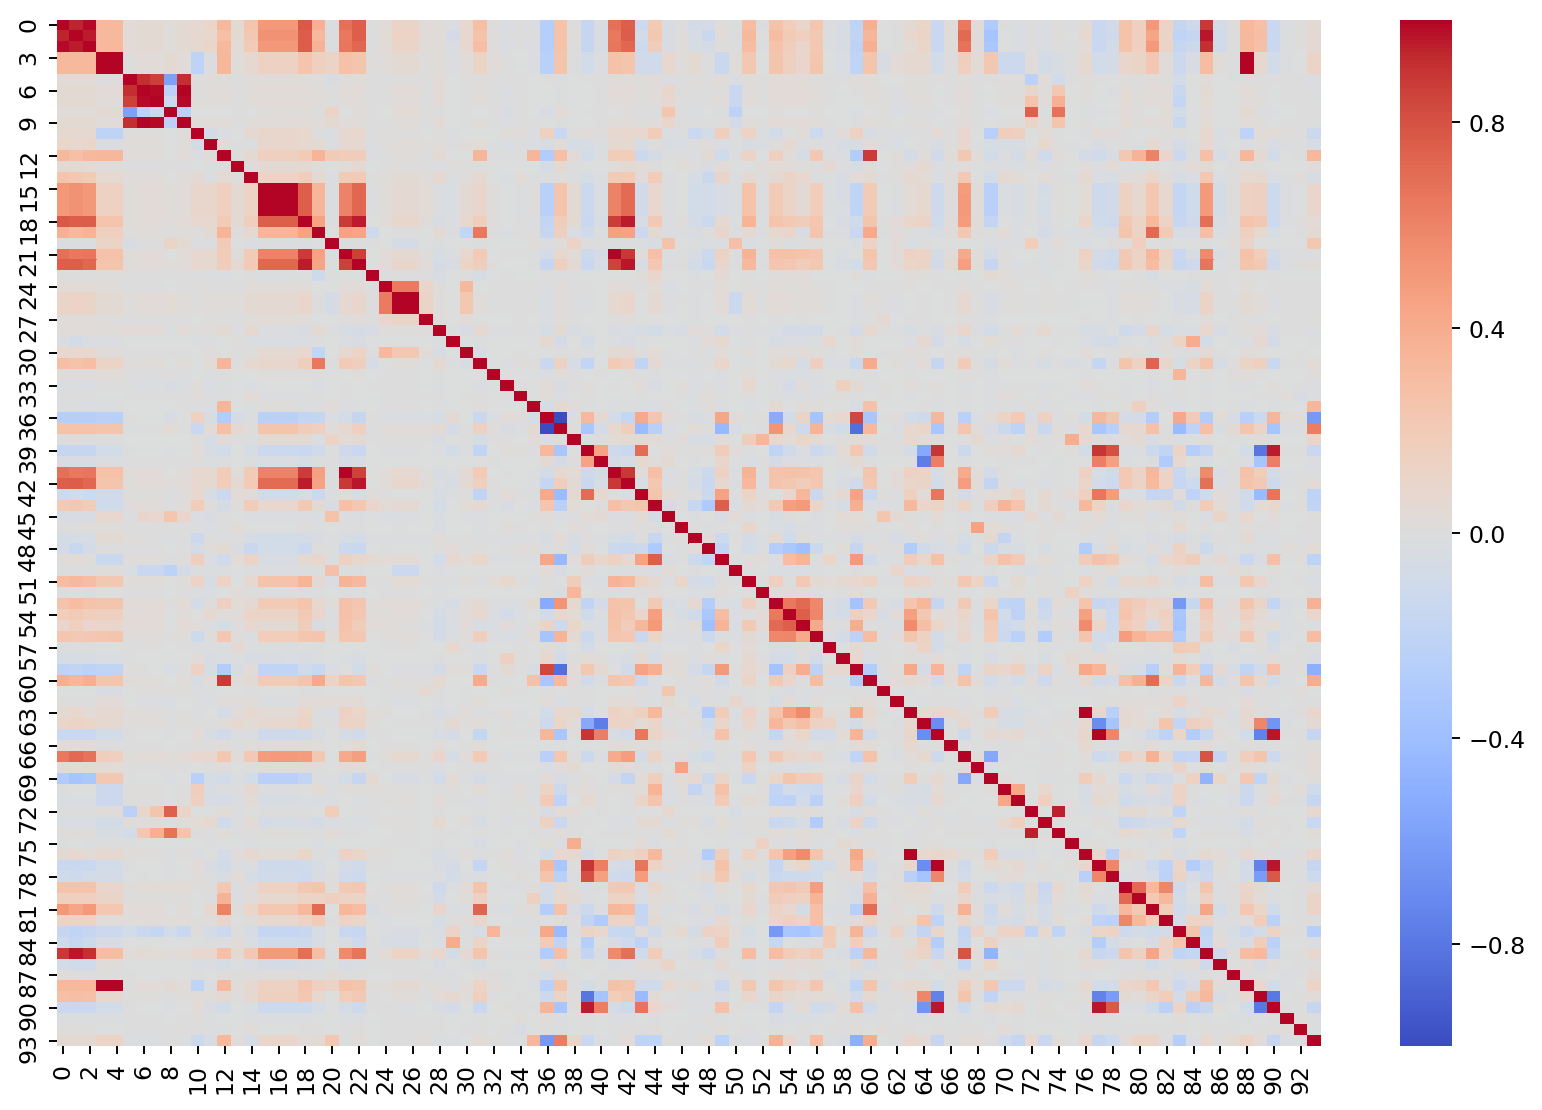

In [64]:
# plot the heatmap
sns.heatmap(corrmatrix, vmin=-1, vmax=1, center=0, cmap= 'coolwarm')
plt.rcParams["figure.figsize"] = [12,8]
plt.show()

It seems like there isn't much correlation between explanatory variables, dimensionality reduction might not be necessary.

In [65]:
# outlier treatment

cols = [c for c in df.columns if c!= 'Bankrupt?']
bounds = {}
for i in cols:
    quantiles = df.approxQuantile(i, [0.25, 0.75], 0.02)
    IQR = quantiles[1] - quantiles[0]
    
    bounds[i] = [
        quantiles[0] - 1.5*IQR, quantiles[1] + 1.5*IQR
    ]
    
outliers = df.select(*['Bankrupt?'] + [
    (
        (df[c] < bounds[c][0]) | (df[c] > bounds[c][1]))
    .alias(c + '_outlier') for c in cols
        ])

#outliers.show()
# the output is very long and hard to read, so we decided not to include it

## Feature Scaling

In [67]:
# normalizer

from pyspark.ml.feature import Normalizer
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.linalg import Vectors

# convert to vector column first
feature_names = [i for i in df.columns[1:]]
feature_names.remove(' Net Income Flag')


assembler = VectorAssembler(inputCols = feature_names, outputCol = 'features')
df2 = assembler.transform(df).withColumnRenamed('Bankrupt?', 'label').select('label', 'features')

# Normalize each Vector using $L^2$ norm.
normalizer = Normalizer(inputCol="features", outputCol="features_scaled", p=2.0)
scaled_df = normalizer.transform(df2).drop('features')


## Data Splitting/Sampling

In [68]:
# split the data into training and testing sets

train_test = [0.8,0.2]
train_data, test_data = scaled_df.randomSplit(train_test, seed=314)

In [69]:
# check class balance in train and test set
train_0 = train_data.where(col('label') == 0).count()
train_1 = train_data.where(col('label') == 1).count()
train_n = train_data.count()
test_0 = test_data.where(col('label') == 0).count()
test_1 = test_data.where(col('label') == 1).count()
test_n = test_data.count()


print('Number of Non-bankrupt Companies in training set: ', train_0,
      ', %: ', round(train_0/train_n*100, 2))
print('Number of Bankrupt Companies in training set: ', train_1,
      ', %: ', round(train_1/train_n*100, 2))
print('-'*50)
print('Number of Non-bankrupt Companies in test set: ', test_0,
      ', %: ', round(test_0/test_n*100, 2))
print('Number of Bankrupt Companies in test set: ', test_1,
      ', %: ', round(test_1/test_n*100, 2))

Number of Non-bankrupt Companies in training set:  5240 , %:  96.98
Number of Bankrupt Companies in training set:  163 , %:  3.02
--------------------------------------------------
Number of Non-bankrupt Companies in test set:  1359 , %:  95.97
Number of Bankrupt Companies in test set:  57 , %:  4.03


The training and test sets seem to have class balances that are fairly representative of the whole data.


However, because of the extreme class imbalance within the data itself, the model is likely to just predict non-bankrupt on all observations to achieve what would be 95.57% accuracy in the test set. Thus, applying some sort of sampling method (oversampling or undersampling) is recommended to combat this. In this case, since the data is relatively small (less than 10,000 observations), oversampling may be more useful.

In [70]:
# implement smote function

import random
import numpy as np
from functools import reduce
import pyspark.sql.functions as F
from pyspark.sql import Row
from pyspark.sql.functions import rand,col,when,concat,substring,lit,udf,lower,sum as ps_sum,count as ps_count,row_number
from pyspark.sql.window import *
from pyspark.sql import DataFrame
from pyspark.ml.feature import VectorAssembler,BucketedRandomProjectionLSH,VectorSlicer
from pyspark.sql.window import Window
from pyspark.ml.linalg import Vectors,VectorUDT
from pyspark.sql.functions import array, create_map, struct

def smote(vectorized_df, k, batches):
    # split the vectorized dataframe by class
    min_obs = vectorized_df.where(col('label') == 1)
    max_obs = vectorized_df.where(col('label') == 0)
    
    # Initialize bucketed random projection for euclidean distance
    brp = BucketedRandomProjectionLSH(inputCol = 'features_scaled', outputCol = 'hashes',seed = 314,
                                      bucketLength = 100)
    # fit only to minority observations
    model = brp.fit(min_obs)
    model.transform(min_obs)
    
    # compute locality sensitive hashes for input rows within the same dataframe, 
    distances = model.approxSimilarityJoin(min_obs, min_obs, float('inf'),
                                               distCol = 'EuclideanDistance')
    # remove self-references
    distances = distances.filter(col('EuclideanDistance') > 0)
    
    over_original_rows = Window.partitionBy('datasetA').orderBy('EuclideanDistance')
    self_similarity = distances.withColumn('r_num', F.row_number().over(over_original_rows))
    self_similarity_selected = self_similarity.filter(col('r_num') <= k)
    over_original_rows_unordered = Window.partitionBy('datasetA')
    
    # list to store synthetic data
    synth = []
    
    # define functions for adding and subtracting vectors
    subtract_vector = F.udf(lambda arr: random.uniform(0,1)*(arr[0]-arr[1]), VectorUDT())
    add_vector = F.udf(lambda arr: arr[0]+arr[1], VectorUDT())
    
    # create synthetic data
    # each batch creates len(min_obs) number of synthetic observations
    for i in range(batches):
        print('generating batch %s of synthetic instances'%i)
        df_random_sel = self_similarity_selected.withColumn("rand", F.rand()).withColumn('max_rand', F.max('rand')\
                                                                                         .over(over_original_rows_unordered))\
                            .where(F.col('rand') == F.col('max_rand')).drop(*['max_rand','rand','r_num'])
        # create synthetic feature numerical part
        df_vec_diff = df_random_sel.select('*', subtract_vector(F.array('datasetA.features_scaled', 'datasetB.features_scaled'))\
                                           .alias('vec_diff'))
        df_vec_modified = df_vec_diff.select('*', add_vector(F.array('datasetA.features_scaled', 'vec_diff')).alias('features_scaled'))
        
        df_vec_modified = df_vec_modified.drop(*['datasetA', 'datasetB', 'vec_diff', 'EuclideanDistance'])
        
        synth.append(df_vec_modified)
        
    dfunion = reduce(DataFrame.unionAll, synth)
    df_w_labels = dfunion.select(lit(1).alias('label'),col('features_scaled'))
    
    oversampled_df = vectorized_df.union(df_w_labels)
    
    return oversampled_df

In [71]:
oversampled_train = smote(train_data, 4, 20).collect()
oversampled_train = spark.createDataFrame(oversampled_train)

generating batch 0 of synthetic instances
generating batch 1 of synthetic instances
generating batch 2 of synthetic instances
generating batch 3 of synthetic instances
generating batch 4 of synthetic instances
generating batch 5 of synthetic instances
generating batch 6 of synthetic instances
generating batch 7 of synthetic instances
generating batch 8 of synthetic instances
generating batch 9 of synthetic instances
generating batch 10 of synthetic instances
generating batch 11 of synthetic instances
generating batch 12 of synthetic instances
generating batch 13 of synthetic instances
generating batch 14 of synthetic instances
generating batch 15 of synthetic instances
generating batch 16 of synthetic instances
generating batch 17 of synthetic instances
generating batch 18 of synthetic instances
generating batch 19 of synthetic instances


In [72]:
# recheck oversampled training data class balance
ost_0 = oversampled_train.where(col('label') == 0).count()
ost_1 = oversampled_train.where(col('label') == 1).count()
ost_n = oversampled_train.count()

print('Number of Non-bankrupt Companies: ', ost_0, ', %: ', round(ost_0/ost_n*100, 2))
print('Number of Bankrupt Companies: ', ost_1, ', %: ', round(ost_1/ost_n*100, 2))

Number of Non-bankrupt Companies:  5240 , %:  60.49
Number of Bankrupt Companies:  3423 , %:  39.51


## Models

In [73]:
# import packages needed for pipelines and models
from pyspark.ml import Pipeline  
from pyspark.ml.feature import *  
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.classification import LinearSVC
from pyspark.ml.tuning import CrossValidator, ParamGridBuilder
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.mllib.evaluation import MulticlassMetrics
from pyspark.ml.classification import RandomForestClassifier

### Logistic Regression (Benchmark)

In [75]:
# model with logit

lr = LogisticRegression(featuresCol = 'features_scaled', labelCol ='label', maxIter=10, regParam=0.1)
# Fit the model
lr_model = lr.fit(oversampled_train)
trainingSummary = lr_model.summary
# Obtain the receiver-operating characteristic as a dataframe and areaUnderROC.
print("training set areaUnderROC: " + str( trainingSummary.areaUnderROC))

# make predictions for each observation in test_data
lr_pred = lr_model.transform(test_data)
lr_pred.cache()

training set areaUnderROC: 0.6603020820092191


DataFrame[label: int, features_scaled: vector, rawPrediction: vector, probability: vector, prediction: double]

#### LogReg Model Evaluation

In [25]:
# store predictions and labels

labelsAndPreds_lr = lr_pred["label", "prediction"].rdd
label_pred_lr = labelsAndPreds_lr.map(lambda p: (float(p.label), float(p.prediction)))
matrix_lr = MulticlassMetrics(label_pred_lr)

print("Confusion Matrix:\n{}".format(matrix_lr.confusionMatrix().toArray()))

Confusion Matrix:
[[1261.   48.]
 [  98.    9.]]


In [76]:
# calculate accuracy, precision, recall, and F1-score
TP_lr = lr_pred.filter('prediction = 1 AND label = prediction').count()
TN_lr = lr_pred.filter('prediction = 0 AND label = prediction').count()
FP_lr = lr_pred.filter('prediction = 1 AND label <> prediction').count()
FN_lr = lr_pred.filter('prediction = 0 AND label <> prediction').count()

accuracy_lr = (TN_lr + TP_lr) / (TN_lr + TP_lr + FN_lr + FP_lr)
precision_lr = TP_lr / (TP_lr + FP_lr)
recall_lr = TP_lr / (TP_lr + FN_lr)
F_lr =  2 * ((precision_lr*recall_lr) / (precision_lr + recall_lr))


print("accuracy: %.4F" % accuracy_lr)
print("precision: %.4F" % precision_lr)
print("recall: %.4F" % recall_lr)
print("F1 score: %.4F" % F_lr)

accuracy: 0.8948
precision: 0.0818
recall: 0.1579
F1 score: 0.1078


In [77]:
# calculate AUROC
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
lr_AUROC = eval.evaluate(lr_pred)
print('AUROC: %.4F' % lr_AUROC)

AUROC: 0.5418


The logistic model only predicts Bankruptcy = 0.

### SVM

In [78]:
# model with svm

# set up svm parameters
svm = LinearSVC(featuresCol = 'features_scaled', labelCol ='label')

# set up parameter grid for CV
svm_paramGrid = (ParamGridBuilder().addGrid(svm.maxIter, [5,10,20])
                                   .addGrid(svm.regParam, [0.1, 0.05, 0.01]).build())

# Create 5-fold CrossValidator
svm_cv = CrossValidator(estimator = svm,
                        estimatorParamMaps = svm_paramGrid,
                        evaluator = BinaryClassificationEvaluator(),
                        numFolds = 5,
                        seed = 314)

cv_svmModel = svm_cv.fit(oversampled_train)

In [79]:
# save the best model
svm_best = cv_svmModel.bestModel

# make predictions for each observation in the test set
svm_pred = svm_best.transform(test_data)
svm_pred.cache()

DataFrame[label: int, features_scaled: vector, rawPrediction: vector, prediction: double]

#### SVM Evaluation

In [80]:
# load prediction values and labels into an RDD for the confusion matrix

labelsAndPreds_svm = svm_pred["label", "prediction"].rdd
label_pred_svm = labelsAndPreds_svm.map(lambda p: (float(p.label), float(p.prediction)))
matrix_svm = MulticlassMetrics(label_pred_svm)

print("Confusion Matrix:\n{}".format(matrix_svm.confusionMatrix().toArray()))

Confusion Matrix:
[[1260.   51.]
 [  99.    6.]]


In [81]:
# calculate accuracy, precision, recall, and F1-score
TP_svm = svm_pred.filter('prediction = 1 AND label = prediction').count()
TN_svm = svm_pred.filter('prediction = 0 AND label = prediction').count()
FP_svm = svm_pred.filter('prediction = 1 AND label <> prediction').count()
FN_svm = svm_pred.filter('prediction = 0 AND label <> prediction').count()

accuracy_svm = (TN_svm + TP_svm) / (TN_svm + TP_svm + FN_svm + FP_svm)
precision_svm = TP_svm / (TP_svm + FP_svm)
recall_svm = TP_svm / (TP_svm + FN_svm)
F_svm =  2 * ((precision_svm*recall_svm) / (precision_svm + recall_svm))


print("accuracy: %.4F" % accuracy_svm)
print("precision: %.4F" % precision_svm)
print("recall: %.4F" % recall_svm)
print("F1 score: %.4F" % F_svm)

accuracy: 0.8941
precision: 0.0571
recall: 0.1053
F1 score: 0.0741


In [82]:
# svm evaluation
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
svm_AUROC = eval.evaluate(svm_pred)
print('AUROC: %.4F' % svm_AUROC)

AUROC: 0.5162


### Random Forest

In [83]:
# initialize random forest model

rf = RandomForestClassifier(featuresCol = 'features_scaled', labelCol = 'label')

# Set up the parameter grid
rfparamGrid = (ParamGridBuilder().addGrid(rf.maxDepth, [2, 5])
                                 .addGrid(rf.maxBins, [5, 10])
                                 .addGrid(rf.numTrees, [100, 300]).build())

# Create 5-fold CrossValidator
rf_cv = CrossValidator(estimator = rf,
                      estimatorParamMaps = rfparamGrid,
                      evaluator = BinaryClassificationEvaluator(),
                      numFolds = 5,
                      seed = 314)

cv_rfModel = rf_cv.fit(oversampled_train)

In [84]:
# save the best model
rf_best = cv_rfModel.bestModel

# make a prediction for each observation in the test set
rf_pred = rf_best.transform(test_data)
rf_pred.cache()

DataFrame[label: int, features_scaled: vector, rawPrediction: vector, probability: vector, prediction: double]

In [85]:
# store labels and predictions

labelsAndPreds_rf = rf_pred["label", "prediction"].rdd
label_pred_rf = labelsAndPreds_rf.map(lambda p: (float(p.label), float(p.prediction)))
matrix_rf = MulticlassMetrics(label_pred_rf)

print("Confusion Matrix:\n{}".format(matrix_rf.confusionMatrix().toArray()))

Confusion Matrix:
[[1304.   30.]
 [  55.   27.]]


In [86]:
# calculate accuracy, precision, recall, and F1-score
TP_rf = rf_pred.filter('prediction = 1 AND label = prediction').count()
TN_rf = rf_pred.filter('prediction = 0 AND label = prediction').count()
FP_rf = rf_pred.filter('prediction = 1 AND label <> prediction').count()
FN_rf = rf_pred.filter('prediction = 0 AND label <> prediction').count()

accuracy_rf = (TN_rf + TP_rf) / (TN_rf + TP_rf + FN_rf + FP_rf)
precision_rf = TP_rf / (TP_rf + FP_rf)
recall_rf = TP_rf / (TP_rf+ FN_rf)
F_rf =  2 * ((precision_rf*recall_rf) / (precision_rf + recall_rf))

print("accuracy: %.4F" % accuracy_rf)
print("precision: %.4F" % precision_rf)
print("recall: %.4F" % recall_rf)
print("F1 score: %.4F" % F_rf)

accuracy: 0.9400
precision: 0.3293
recall: 0.4737
F1 score: 0.3885


In [87]:
# Calculate AUROC
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
rf_AUROC = eval.evaluate(rf_pred)
print('AUROC: %.4F' % rf_AUROC)

AUROC: 0.7166


## Sensitivity Analysis

In [45]:
#senstivity analysis for logistic model

#change regParam to 0.01, 0.001
sa_lr1 = LogisticRegression(featuresCol = 'features_scaled', labelCol ='label', maxIter=10, regParam=0.01)
sa_lr2 = LogisticRegression(featuresCol = 'features_scaled', labelCol ='label', maxIter=10, regParam=0.001)

lr1_model = sa_lr1.fit(oversampled_train)
lr2_model = sa_lr2.fit(oversampled_train)

lr1_pred = lr1_model.transform(test_data)
lr2_pred = lr2_model.transform(test_data)

#regParam = 0.01 metrics
labelsAndPreds_lr1 = lr1_pred["label", "prediction"].rdd
label_pred_lr1 = labelsAndPreds_lr1.map(lambda p: (float(p.label), float(p.prediction)))
matrix_lr1 = MulticlassMetrics(label_pred_lr1)

print("Confusion Matrix when regParam = 0.01:\n{}".format(matrix_lr1.confusionMatrix().toArray()))

TP_lr1 = lr1_pred.filter('prediction = 1 AND label = prediction').count()
TN_lr1 = lr1_pred.filter('prediction = 0 AND label = prediction').count()
FP_lr1 = lr1_pred.filter('prediction = 1 AND label <> prediction').count()
FN_lr1 = lr1_pred.filter('prediction = 0 AND label <> prediction').count()

accuracy_lr1 = (TN_lr1 + TP_lr1) / (TN_lr1 + TP_lr1 + FN_lr1 + FP_lr1)
precision_lr1 = TP_lr1 / (TP_lr1 + FP_lr1)
recall_lr1 = TP_lr1 / (TP_lr1 + FN_lr1)
F_lr1 =  2 * ((precision_lr1*recall_lr1) / (precision_lr1 + recall_lr1))

print("accuracy when regParam = 0.01: %.4F" % accuracy_lr1)
print("precision when regParam = 0.01: %.4F" % precision_lr1)
print("recall when regParam = 0.01: %.4F" % recall_lr1)
print("F1 score when regParam = 0.01: %.4F" % F_lr1)

eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
lr1_AUROC = eval.evaluate(lr1_pred)
print('AUROC when regParam = 0.01: %.4F' % lr1_AUROC)

#regParam = 0.001 metrics

labelsAndPreds_lr2 = lr2_pred["label", "prediction"].rdd
label_pred_lr2 = labelsAndPreds_lr2.map(lambda p: (float(p.label), float(p.prediction)))
matrix_lr2 = MulticlassMetrics(label_pred_lr2)

print("Confusion Matrix when regParam = 0.001:\n{}".format(matrix_lr2.confusionMatrix().toArray()))

TP_lr2 = lr2_pred.filter('prediction = 1 AND label = prediction').count()
TN_lr2 = lr2_pred.filter('prediction = 0 AND label = prediction').count()
FP_lr2 = lr2_pred.filter('prediction = 1 AND label <> prediction').count()
FN_lr2 = lr2_pred.filter('prediction = 0 AND label <> prediction').count()

accuracy_lr2 = (TN_lr2 + TP_lr2) / (TN_lr2 + TP_lr2 + FN_lr2 + FP_lr2)
precision_lr2 = TP_lr2 / (TP_lr2 + FP_lr2)
recall_lr2 = TP_lr2 / (TP_lr2 + FN_lr2)
F_lr2 =  2 * ((precision_lr2*recall_lr2) / (precision_lr2 + recall_lr2))

print("accuracy when regParam = 0.001: %.4F" % accuracy_lr2)
print("precision when regParam = 0.001: %.4F" % precision_lr2)
print("recall when regParam = 0.001: %.4F" % recall_lr2)
print("F1 score when regParam = 0.001: %.4F" % F_lr2)


eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
lr2_AUROC = eval.evaluate(lr2_pred)
print('AUROC when regParam = 0.001: %.4F' % lr2_AUROC)


Confusion Matrix when regParam = 0.01:
[[1210.   43.]
 [ 149.   14.]]
accuracy when regParam = 0.01: 0.8644
precision when regParam = 0.01: 0.0859
recall when regParam = 0.01: 0.2456
F1 score when regParam = 0.01: 0.1273
AUROC when regParam = 0.01: 0.5680
Confusion Matrix when regParam = 0.001:
[[1207.   42.]
 [ 152.   15.]]
accuracy when regParam = 0.001: 0.8630
precision when regParam = 0.001: 0.0898
recall when regParam = 0.001: 0.2632
F1 score when regParam = 0.001: 0.1339
AUROC when regParam = 0.001: 0.5757


In [88]:
#sensitivity analysis for svm

svm_best._java_obj.getRegParam() # 0.05
svm_best._java_obj.getMaxIter() #10

# hyperparameters for best svm model were MaxIter = 10, RegParam = 0.05

#change regParam to 0.1 and 0.01 
svm1 = LinearSVC(featuresCol = 'features_scaled', labelCol ='label', maxIter = 10, regParam = 0.1)
svm2 = LinearSVC(featuresCol = 'features_scaled', labelCol ='label', maxIter = 10, regParam = 0.01)

svm_model1 = svm1.fit(oversampled_train)
svm_model2 = svm2.fit(oversampled_train)

svm_pred1 = svm_model1.transform(test_data)
svm_pred2 = svm_model2.transform(test_data)


# regParam = 0.1 metrics
labelsAndPreds_svm1 = svm_pred1["label", "prediction"].rdd
label_pred_svm1 = labelsAndPreds_svm1.map(lambda p: (float(p.label), float(p.prediction)))
matrix_svm1 = MulticlassMetrics(label_pred_svm1)

print("Confusion Matrix when RegParam = 0.1:\n{}".format(matrix_svm1.confusionMatrix().toArray()))

TP_svm1 = svm_pred1.filter('prediction = 1 AND label = prediction').count()
TN_svm1 = svm_pred1.filter('prediction = 0 AND label = prediction').count()
FP_svm1 = svm_pred1.filter('prediction = 1 AND label <> prediction').count()
FN_svm1 = svm_pred1.filter('prediction = 0 AND label <> prediction').count()

accuracy_svm1 = (TN_svm1 + TP_svm1) / (TN_svm1 + TP_svm1 + FN_svm1 + FP_svm1)
precision_svm1 = TP_svm1 / (TP_svm1 + FP_svm1)
recall_svm1 = TP_svm1 / (TP_svm1 + FN_svm1)
F_svm1 =  2 * ((precision_svm1*recall_svm1) / (precision_svm1 + recall_svm1))

print("accuracy when RegParam = 0.1: %.4F" % accuracy_svm1)
print("precision when RegParam = 0.1: %.4F" % precision_svm1)
print("recall when RegParam = 0.1: %.4F" % recall_svm1)
print("F1 score when RegParam = 0.1: %.4F" % F_svm1)

eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
svm1_AUROC = eval.evaluate(svm_pred1)
print('AUROC when regParam = 0.1: %.4F' % svm1_AUROC)

labelsAndPreds_svm2 = svm_pred2["label", "prediction"].rdd
label_pred_svm2 = labelsAndPreds_svm2.map(lambda p: (float(p.label), float(p.prediction)))
matrix_svm2 = MulticlassMetrics(label_pred_svm2)

print("Confusion Matrix when RegParam = 0.01:\n{}".format(matrix_svm2.confusionMatrix().toArray()))

TP_svm2 = svm_pred2.filter('prediction = 1 AND label = prediction').count()
TN_svm2 = svm_pred2.filter('prediction = 0 AND label = prediction').count()
FP_svm2 = svm_pred2.filter('prediction = 1 AND label <> prediction').count()
FN_svm2 = svm_pred2.filter('prediction = 0 AND label <> prediction').count()

accuracy_svm2 = (TN_svm2 + TP_svm2) / (TN_svm2 + TP_svm2 + FN_svm2 + FP_svm2)
precision_svm2 = TP_svm2 / (TP_svm2 + FP_svm2)
recall_svm2 = TP_svm2 / (TP_svm2 + FN_svm2)
F_svm2 =  2 * ((precision_svm2*recall_svm2) / (precision_svm2 + recall_svm2))

print("accuracy when RegParam = 0.01: %.4F" % accuracy_svm2)
print("precision when RegParam = 0.01: %.4F" % precision_svm2)
print("recall when RegParam = 0.01: %.4F" % recall_svm2)
print("F1 score when RegParam = 0.01: %.4F" % F_svm2)

eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
svm2_AUROC = eval.evaluate(svm_pred2)
print('AUROC when regParam = 0.01: %.4F' % svm2_AUROC)


Confusion Matrix when RegParam = 0.1:
[[1305.   52.]
 [  54.    5.]]
accuracy when RegParam = 0.1: 0.9251
precision when RegParam = 0.1: 0.0847
recall when RegParam = 0.1: 0.0877
F1 score when RegParam = 0.1: 0.0862
AUROC when regParam = 0.1: 0.5240
Confusion Matrix when RegParam = 0.01:
[[1260.   51.]
 [  99.    6.]]
accuracy when RegParam = 0.01: 0.8941
precision when RegParam = 0.01: 0.0571
recall when RegParam = 0.01: 0.1053
F1 score when RegParam = 0.01: 0.0741
AUROC when regParam = 0.01: 0.5162


In [100]:
rf_best.getMaxDepth() #5
rf_best.getMaxBins() #10
#rf_best.extractParamMap()
# params for best rf model are maxDepth = 5, maxBins = 10, numTrees = 300

rf_sa_1 = RandomForestClassifier(featuresCol = 'features_scaled', labelCol = 'label', numTrees = 300, maxBins =  5, maxDepth = 5)
rf_sa_2 = RandomForestClassifier(featuresCol = 'features_scaled', labelCol = 'label', numTrees = 300, maxBins = 10, maxDepth = 2)

rf_model1= rf_sa_1.fit(oversampled_train)
rf_model2 = rf_sa_2.fit(oversampled_train)

rf_pred1 = rf_model1.transform(test_data)
rf_pred2 = rf_model2.transform(test_data)


labelsAndPreds_rf1 = rf_pred1["label", "prediction"].rdd
label_pred_rf1 = labelsAndPreds_rf1.map(lambda p: (float(p.label), float(p.prediction)))
matrix_rf1 = MulticlassMetrics(label_pred_rf1)

print("Confusion Matrix when maxBins = 5:\n{}".format(matrix_rf1.confusionMatrix().toArray()))

# calculate accuracy, precision, recall, and F1-score
TP_rf1 = rf_pred1.filter('prediction = 1 AND label = prediction').count()
TN_rf1 = rf_pred1.filter('prediction = 0 AND label = prediction').count()
FP_rf1 = rf_pred1.filter('prediction = 1 AND label <> prediction').count()
FN_rf1 = rf_pred1.filter('prediction = 0 AND label <> prediction').count()

accuracy_rf1 = (TN_rf1 + TP_rf1) / (TN_rf1 + TP_rf1 + FN_rf1 + FP_rf1)
precision_rf1 = TP_rf1 / (TP_rf + FP_rf1)
recall_rf1 = TP_rf1 / (TP_rf1+ FN_rf1)
F_rf1 =  2 * ((precision_rf1*recall_rf1) / (precision_rf1 + recall_rf1))

print("accuracy when maxBins = 5: %.4F" % accuracy_rf1)
print("precision when maxBins = 5: %.4F" % precision_rf1)
print("recall when maxBins = 5: %.4F" % recall_rf1)
print("F1 score when maxBins = 5: %.4F" % F_rf1)

# Calculate AUROC
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
rf_AUROC1 = eval.evaluate(rf_pred1)
print('AUROC when maxBins = 5: %.4F' % rf_AUROC1)

labelsAndPreds_rf2 = rf_pred2["label", "prediction"].rdd
label_pred_rf2 = labelsAndPreds_rf2.map(lambda p: (float(p.label), float(p.prediction)))
matrix_rf2 = MulticlassMetrics(label_pred_rf2)

print("Confusion Matrix:\n{}".format(matrix_rf2.confusionMatrix().toArray()))

# calculate accuracy, precision, recall, and F1-score
TP_rf2 = rf_pred2.filter('prediction = 1 AND label = prediction').count()
TN_rf2 = rf_pred2.filter('prediction = 0 AND label = prediction').count()
FP_rf2 = rf_pred2.filter('prediction = 1 AND label <> prediction').count()
FN_rf2 = rf_pred2.filter('prediction = 0 AND label <> prediction').count()

accuracy_rf2 = (TN_rf2 + TP_rf2) / (TN_rf2 + TP_rf2 + FN_rf2 + FP_rf2)
precision_rf2 = TP_rf2 / (TP_rf2 + FP_rf2)
recall_rf2 = TP_rf2 / (TP_rf2+ FN_rf2)
F_rf2 =  2 * ((precision_rf2*recall_rf2) / (precision_rf2 + recall_rf2))

print("accuracy when maxDepth = 2: %.4F" % accuracy_rf2)
print("precision when maxDepth = 2:: %.4F" % precision_rf2)
print("recall when maxDepth = 2:: %.4F" % recall_rf2)
print("F1 score when maxDepth = 2:: %.4F" % F_rf2)

# Calculate AUROC
eval = BinaryClassificationEvaluator().setLabelCol('label').setRawPredictionCol('prediction').setMetricName('areaUnderROC')
rf_AUROC2 = eval.evaluate(rf_pred2)
print('AUROC when maxDepth = 2:: %.4F' % rf_AUROC2)


Confusion Matrix when maxBins = 5:
[[1276.   21.]
 [  83.   36.]]
accuracy when maxBins = 5: 0.9266
precision when maxBins = 5: 0.3303
recall when maxBins = 5: 0.6316
F1 score when maxBins = 5: 0.4337
AUROC when maxBins = 5: 0.7853
Confusion Matrix:
[[1302.   31.]
 [  57.   26.]]
accuracy when maxDepth = 2: 0.9379
precision when maxDepth = 2:: 0.3133
recall when maxDepth = 2:: 0.4561
F1 score when maxDepth = 2:: 0.3714
AUROC when maxDepth = 2:: 0.7071


In [101]:
rf_best.featureImportances

SparseVector(94, {0: 0.0091, 1: 0.018, 2: 0.0083, 3: 0.0002, 4: 0.0001, 5: 0.0001, 6: 0.0002, 7: 0.0003, 8: 0.0001, 9: 0.0002, 10: 0.003, 11: 0.0868, 12: 0.0001, 13: 0.0032, 14: 0.1323, 15: 0.0004, 16: 0.0017, 17: 0.0014, 18: 0.0065, 19: 0.0002, 20: 0.0074, 21: 0.0121, 22: 0.0117, 23: 0.0008, 24: 0.0003, 25: 0.0001, 26: 0.0001, 27: 0.0005, 28: 0.0006, 29: 0.0115, 30: 0.0001, 31: 0.0007, 32: 0.0508, 33: 0.0711, 34: 0.0002, 35: 0.0288, 36: 0.0203, 37: 0.0002, 38: 0.0031, 39: 0.0007, 40: 0.001, 41: 0.0134, 42: 0.0107, 43: 0.0002, 44: 0.0042, 45: 0.0188, 46: 0.0016, 47: 0.0244, 48: 0.0137, 49: 0.0059, 50: 0.0127, 51: 0.0001, 52: 0.0143, 53: 0.0003, 54: 0.0024, 55: 0.0007, 56: 0.0448, 57: 0.0364, 58: 0.0427, 59: 0.0074, 60: 0.0001, 61: 0.0002, 62: 0.0017, 63: 0.0003, 64: 0.0003, 65: 0.0004, 66: 0.0962, 67: 0.0002, 68: 0.0015, 69: 0.0054, 70: 0.0046, 71: 0.0007, 72: 0.0001, 73: 0.0043, 74: 0.0004, 75: 0.0006, 76: 0.0002, 77: 0.0003, 78: 0.0012, 79: 0.0004, 80: 0.0004, 81: 0.0002, 82: 0.0001,

In [102]:
temp = rf_best.featureImportances.toArray()
featureImportance_df = pd.DataFrame({'feature_names':feature_names, 'Importance':temp})
featureImportance_df.sort_values(by=['Importance'],ascending=False)

,feature_names,Importance
14,Tax rate (A),0.132299
66,Long-term Liability to Current Assets,0.096189
11,Research and development expense rate,0.086779
33,Quick Ratio,0.071057
93,Equity to Liability,0.061311
...,...,...
8,Non-industry income and expenditure/revenue,0.000078
72,Working capitcal Turnover Rate,0.000076
26,Regular Net Profit Growth Rate,0.000073
89,Net Income to Stockholder's Equity,0.000036
